In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv("test.csv")

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df1 = df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [7]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
df_test1 = df_test.drop(["Name", "Ticket", "Cabin"], axis=1)

In [9]:
df_test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [10]:
df2 = df1.replace("male", 0).replace("female", 1).replace("S", 0).replace("C", 1).replace("Q", 2)

In [11]:
df_test2 = df_test1.replace("male", 0).replace("female", 1).replace("S", 0).replace("C", 1).replace("Q", 2)

In [12]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [13]:
df_test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [14]:
# df2["Age"] = df2.fillna(df2["Age"].median())としていたためデータがおかしなことに、、
df2["Age"] = df2["Age"].fillna(df2["Age"].median())

In [15]:
# df_test2["Age"] = df_test2.fillna(df_test2["Age"].median())としていたためデータがおかしなことに、、
df_test2["Age"] = df_test2["Age"].fillna(df2["Age"].median())

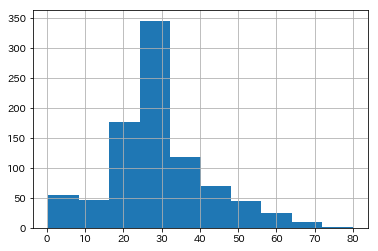

In [16]:
# Ageの欠損値のみがmedianで補完できたかどうかをヒストグラムで確認
df2["Age"].hist()

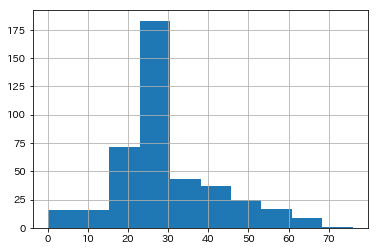

In [17]:
# 同じくAgeの欠損値のみがmedianで補完できたかどうかをヒストグラムで確認
df_test2["Age"].hist()

In [18]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [19]:
df_test2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

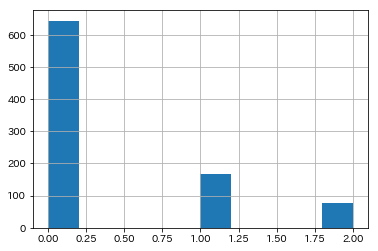

In [20]:
df2["Embarked"].hist()
# 0が多いので欠損値を0で補完することにした

In [21]:
# df2["Embarked"] = df2.fillna(0)としていたためデータがおかしなことに、、
df2["Embarked"] = df2["Embarked"].fillna(0)

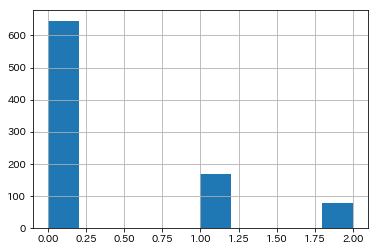

In [25]:
# Embarkedの欠損値のみが0で補完できたかどうかをヒストグラムで確認
df2["Embarked"].hist()

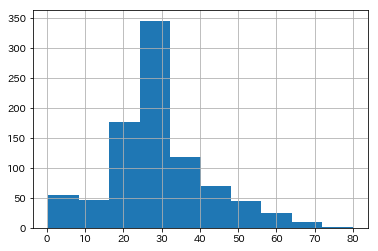

In [23]:
df2["Age"].hist()

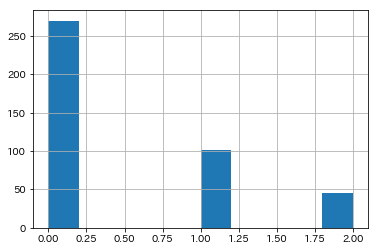

In [26]:
df_test2["Embarked"].hist()

In [33]:
df_test2["Fare"].mean()

35.6271884892086

In [32]:
df_test2["Fare"].median()

14.4542

In [34]:
df_test2["Fare"] = df_test2["Fare"].fillna(df_test2["Fare"].median())

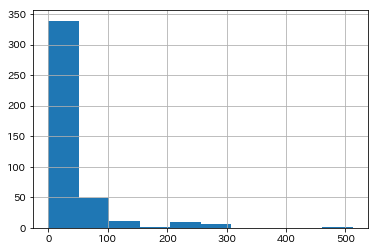

In [35]:
df_test2["Fare"].hist()

In [29]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
df_test2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# ここまでで、欠損値の補完が完了

In [37]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [38]:
df_test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


In [40]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [ ]:
# ここまでで欠損値の補完、数値型への変換が完了

In [41]:
# pandasのDataFrameはそのままではscikit-learnに渡せない。
# 数値データではないカラムへの対処、数値データのnumpy.ndarrayへの変換が必要らしい
# 数値データへの変換は完了済み
# 最後にvaluesメソッドを使うことでnumpy.ndarrayに変換可能
train_data = df2.values

In [ ]:
# --ここから学習--

In [ ]:
# まずは学習に使うデータセットの準備（説明変数と目的変数の切り分け、何を説明変数、目的変数とするのか）

In [42]:
# 3列目以降のカラムを学習データに
train_x = train_data[: , 2:]

In [43]:
# Survivedを正解データに
train_y = train_data[:, 1]

In [ ]:
# --データセットが準備できたらモデルの選択

In [44]:
# ランダムフォレスト用
from sklearn.ensemble import RandomForestClassifier

In [45]:
# 決定木の数を50に設定してモデルインスタンスを作成
clf = RandomForestClassifier(n_estimators = 50, random_state=0)

In [ ]:
# データセットを用意してモデル(今回はランダムフォレスト)も選択できれば、次にやることはトレーニングデータを使った学習
# --やっと学習

In [47]:
# clf.fit(x_train, y_train)
# と書くだけです。たった一行書くだけで学習ができます。
clf = clf.fit(train_x, train_y)

In [ ]:
# ----------------------------------------------

In [48]:
# testデータも最後にvaluesメソッドを使うことでnumpy.ndarrayに変換する
test_data = df_test2.values

In [49]:
# Pclass以降のカラムを説明変数とする
test_x = test_data[: , 1:]

In [50]:
# 最後はテストデータを使った予測です。
# clf.predict(x_test)
# と書くだけです。学習フェーズと同様、たった一行書くだけで予測ができます。
test_y = clf.predict(test_x)

In [ ]:
# ---ここからは予測結果をデフォルトのtest.csvファイルに読み込み、そのファイルを出力する
# https://qiita.com/teru855/items/02bd885179bd8e39ba43
# を参考にしてcsvファイル出力

In [51]:
# 再度デフォルトのtest.csvファイルを読み込む
df_output = pd.read_csv("test.csv")

In [53]:
# デフォルトのtest.csvファイル(df_output)にSurvivedを追加し、Survived各行の値は予測したtest_yを代入する
df_output["Survived"] = test_y

In [54]:
# df_outputの中の"PassengerId","Survived"のみを抽出したものをcsvファイルとして出力(to_csv:csvファイルへ送る)
df_output[["PassengerId","Survived"]].to_csv("output_submission_180428.csv",index=False)

In [ ]:
# ---これで終了。カレントディレクトリに出力されたoutput_submission_180428.csvファイルをkaggleに提出→正解率は0.71770